<a href="https://colab.research.google.com/github/goglom/Digital-data-processing-and-discrete-analysis-methods/blob/main/problem_2/problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import numpy as np
import numpy.fft as fft
import matplotlib.pyplot as plt 

In [77]:
def HenningWindow(x: np.array) -> np.array:
    result = np.zeros_like(x)
    N = x.shape[0]
    for i in range(N):
        result[i] = x[i] * 0.5 *(1 - np.cos((2 * np.pi * i) / (N - 1)))

    return result

In [78]:
def HammingWindow(x: np.array) -> np.array:
    result = np.zeros_like(x)
    N = x.shape[0]
    for i in range(N):
        result[i] = x[i] * (0.53836 - 0.46164 * np.cos((2 * np.pi * i) / (N - 1)))
    
    return result

In [79]:
def plotFFT(x: np.array):
    assert x.ndim == 1

    data = [x, HenningWindow(x), HammingWindow(x)]
    titles = ["Прямоугольное", "Хеннинг", "Хэмминг"]    
    fft_data = np.abs(fft.fft(data))
    freq = fft.fftfreq(x.size) * 2 * np.pi
    plt.figure(dpi=80, figsize=(18, 6))
    max_fft = np.max(fft_data)


    for i, res in enumerate(fft_data):
        plt.subplot(1, len(data), i + 1)
        plt.title(titles[i])
        plt.grid()
        plt.stem(freq, res, use_line_collection=True, linefmt='C3', markerfmt=None)
        plt.xlabel("w")
        plt.ylabel("abs")
        plt.ylim(0, max_fft * 1.1)

    plt.tight_layout()

#Постоянный сигнал

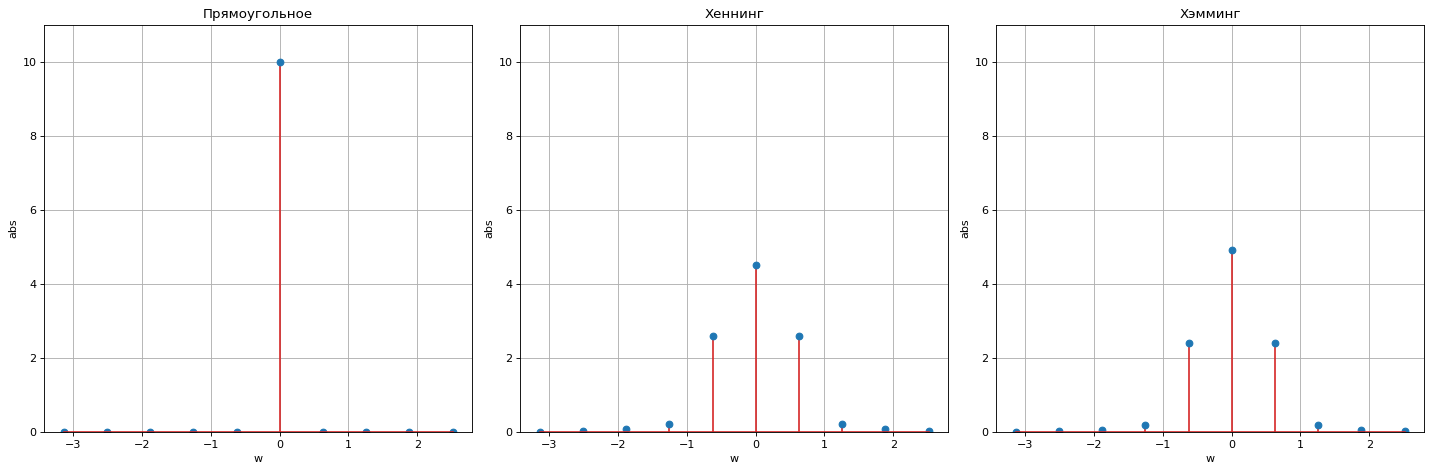

In [80]:
N = 10
plotFFT(np.ones(N))

# Прямоугольный импульс

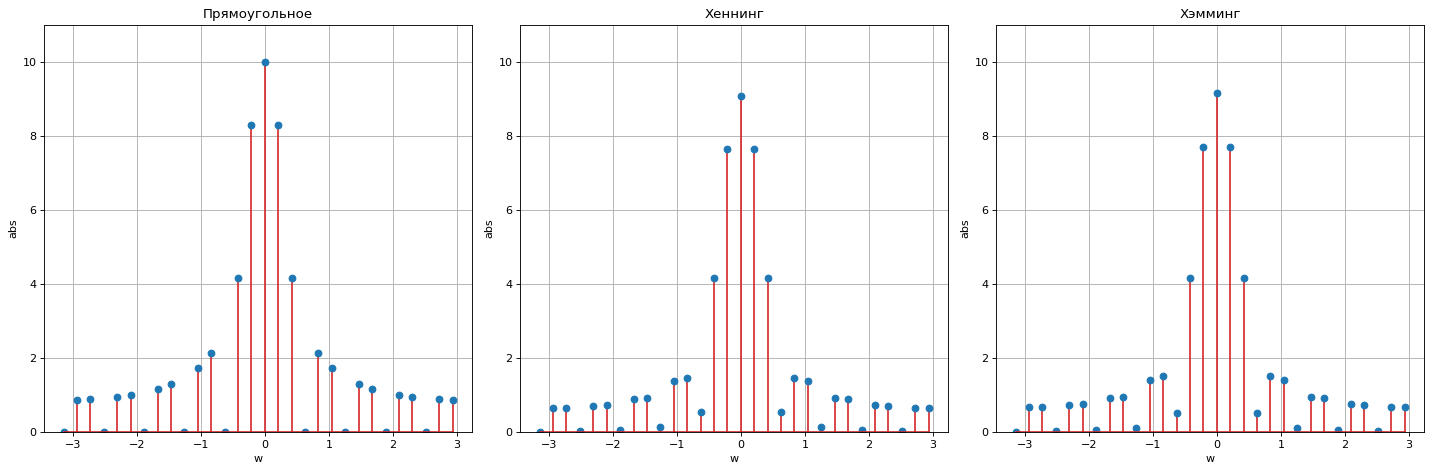

In [81]:
N = 10
plotFFT(np.concatenate((np.zeros(N), np.full(N, 1), np.zeros(N))))

#Синусоидальный сигнал

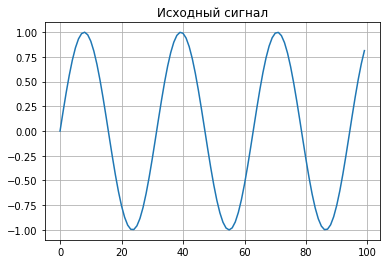

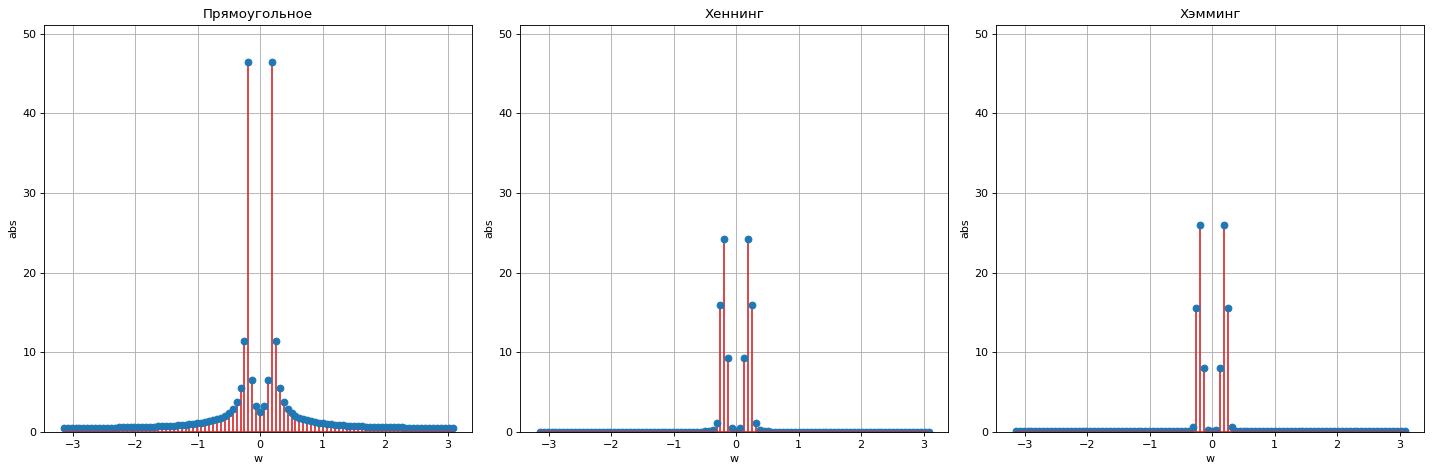

In [82]:
N = 100
x = np.sin(0.2 * np.arange(0, N))
plt.plot(x)
plt.title("Исходный сигнал")
plt.grid()

plotFFT(x)

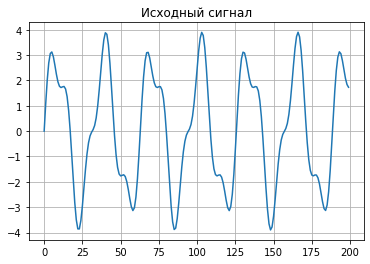

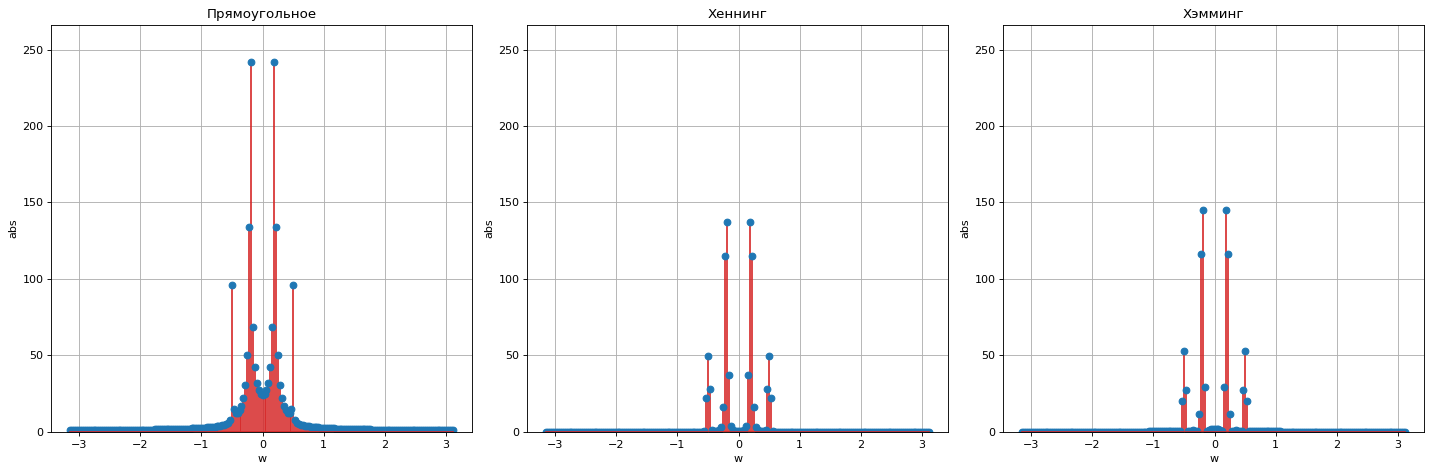

In [83]:
N = 200
x = 3 * np.sin(0.2 * np.arange(0, N)) + np.sin(0.5 * np.arange(0, N))
plt.plot(x)
plt.title("Исходный сигнал")
plt.grid()

plotFFT(x)